In [45]:
! pip install tensorflow==2.2.1
! pip install swish-activation

# WILDFIRE URBAN INTERFACE: Fire and Smoke Recognition 

# IMAGE CLASSIFICATION USING DEEP LEARNING

In [28]:
# Importing tensorflow and ImageDataGenerator

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Need version >> 2.o

In [3]:
tf.__version__


'2.2.1'

# AUGMENTING THE DATA SET

In [6]:
# Batch_size is 16, batch size is the size of images  where 

batch_size = 16
training_datagenerator = ImageDataGenerator(rescale=1./255, vertical_flip = True, horizontal_flip=True, 
                                            width_shift_range = 0.2, height_shift_range = 0.2, shear_range=0.2,
                                            zoom_range=0.2,validation_split=0.1)

# Dividing data in training and validation in the ratio of 90% to 10%

In [8]:
train = training_datagenerator.flow_from_directory(r"C:\Users\divya\Documents\FluidStructureInteraction\WUI UCB\Training_data", target_size=(256,256), color_mode='rgb', class_mode='binary', batch_size=16,subset='training')
validation = training_datagenerator.flow_from_directory(r"C:\Users\divya\Documents\FluidStructureInteraction\WUI UCB\Training_data",  target_size=(256,256), color_mode='rgb', class_mode='binary', batch_size=16, subset = 'validation')

Found 12360 images belonging to 2 classes.
Found 1373 images belonging to 2 classes.


In [9]:
#Creating CNN Architecture

In [10]:
# Initializing CNN
cnn=tf.keras.models.Sequential()

# adding first layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding second layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding third layer
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Output layers
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [11]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 256)       147712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 262144)            0

In [12]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(r"C:\Users\divya\Documents\FluidStructureInteraction\WUI UCB\Models\model.h5",
                                             monitor='val_loss',mode="min",
                                             save_best_only=True)
callbacks=[checkpoint]


In [13]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

cnn.fit_generator(train,validation_data=validation,epochs=1,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,
                  callbacks=callbacks 
                 )

W0914 23:41:41.391806 31720 deprecation.py:323] From <ipython-input-13-7e5d21895a19>:6: Model.fit_generator (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
Please use Model.fit, which supports generators.


772/772 [==============================] - 2514s 3s/step - loss: 0.0833 - accuracy: 0.9787 - val_loss: 0.0234 - val_accuracy: 0.9904


In [14]:
from tensorflow.keras.models import load_model
cnn=load_model(r'C:\Users\divya\Documents\FluidStructureInteraction\WUI UCB\Models\model.h5')

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 256)       147712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 262144)            0

In [42]:
from tensorflow.python.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [48]:
image_for_testing=(r'C:\Users\divya\Documents\FluidStructureInteraction\WUI UCB\Aaag.jpg')

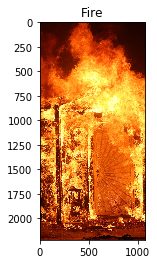

In [49]:
test_image=image.load_img(image_for_testing,target_size=(256,256))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict_classes(test_image)

Categories = ['Fire', 'Smoke']

image_show = PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(Categories[int(result[0][0])])
plt.show()
